In [2]:
#Step 1. Import libraries and load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('AAPL.csv')

In [3]:
# Data Preview
print(df.head())
print("\n Summary Info:")
print(df.info())


         Date      Open      High       Low     Close  Adj Close     Volume
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.100323  469033600
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.095089  175884800
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.088110  105728000
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.090291   86441600
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.092908   73449600

 Summary Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10409 entries, 0 to 10408
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10409 non-null  object 
 1   Open       10409 non-null  float64
 2   High       10409 non-null  float64
 3   Low        10409 non-null  float64
 4   Close      10409 non-null  float64
 5   Adj Close  10409 non-null  float64
 6   Volume     10409 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 569.4+

In [4]:
#Parse data and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

#Sort date
df.sort_index(inplace=True)

In [5]:
#Check missing values
print("\nMissing Values:\n",df.isnull().sum())


Missing Values:
 Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [6]:
# Drop rows with nulls or interpolate (if minor)
df = df[['Close']].dropna()  # focus only on 'Close' price

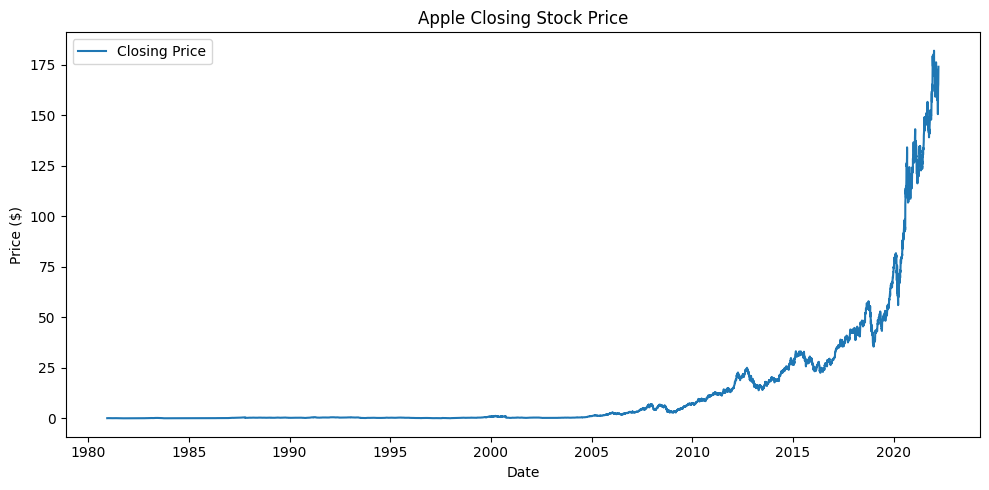

In [7]:
# Step 2: Exploratory Time Series Analysis
#plot closing price overtime
plt.figure(figsize=(10,5))
plt.plot(df['Close'],label='Closing Price')
plt.title('Apple Closing Stock Price')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.tight_layout()
plt.show()

In [8]:
# 👇 Add this line
df = df[df.index >= "2009-01-01"]  # Only data from 2009 onward is used, as the upward trend starts around that time."starting 2009

In [9]:
#Rolling Mean and Standard Diviation
rolling_mean = df['Close'].rolling(window=30).mean() # 30-day moving average
rolling_std = df['Close'].rolling(window=30).std()  # 30-day standard deviation

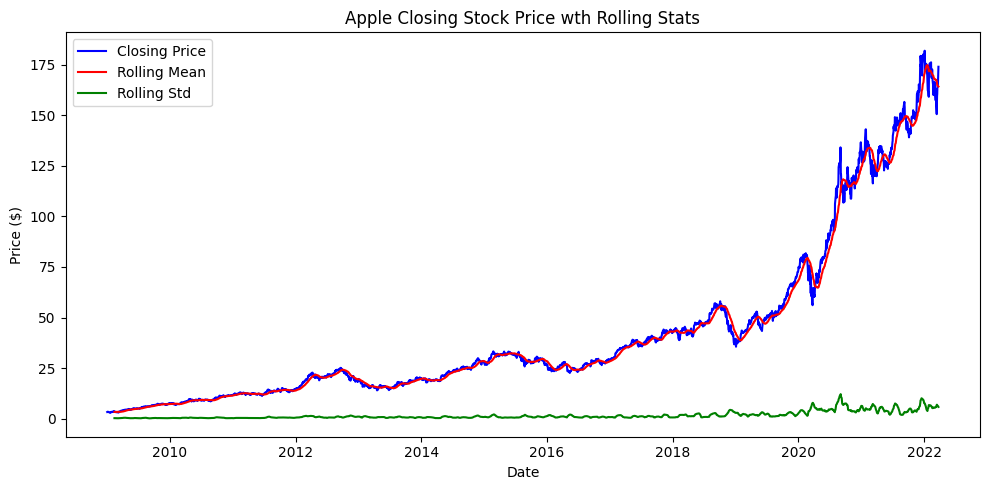

In [10]:
# Plot rolling statistics
plt.figure(figsize=(10,5))
plt.plot(df['Close'],label='Closing Price',color='blue')
plt.plot(rolling_mean,label='Rolling Mean',color='red')
plt.plot(rolling_std,label='Rolling Std',color='green')
plt.title('Apple Closing Stock Price wth Rolling Stats')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.tight_layout()
plt.show()

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Step 3: Decomposition

# Resample to monthly frequency to smooth out noise and reduce irregularities
monthly_data=df['Close'].resample('M').mean()

# Additive Decomposition
additive_decomp = seasonal_decompose(monthly_data,model ='additive', period=12)

# Multiplicative Decomposition
multiplicative_decomp = seasonal_decompose(monthly_data,model='multiplicative',period = 12)

<Figure size 1200x800 with 0 Axes>

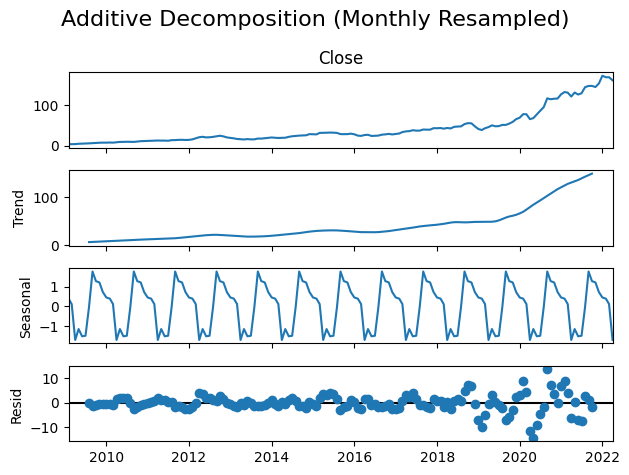

In [12]:
# Plot Additive Decomposition
plt.figure(figsize=(12, 8))
additive_decomp.plot()
plt.suptitle('Additive Decomposition (Monthly Resampled)', fontsize=16)
plt.tight_layout()
plt.show()

In [13]:
'''
- The trend component shows a clear and smooth upward progression—well captured.
- The seasonal component maintains relatively constant amplitude over time.
- The residuals are centered around zero, which is desirable.
Concerns:
- The residual component shows larger spikes in recent years, indicating increased variance, which the additive model may not handle well.
- Seasonality amplitude remains fixed, not scaling with price level.
'''

'\n- The trend component shows a clear and smooth upward progression—well captured.\n- The seasonal component maintains relatively constant amplitude over time.\n- The residuals are centered around zero, which is desirable.\nConcerns:\n- The residual component shows larger spikes in recent years, indicating increased variance, which the additive model may not handle well.\n- Seasonality amplitude remains fixed, not scaling with price level.\n'

<Figure size 1200x600 with 0 Axes>

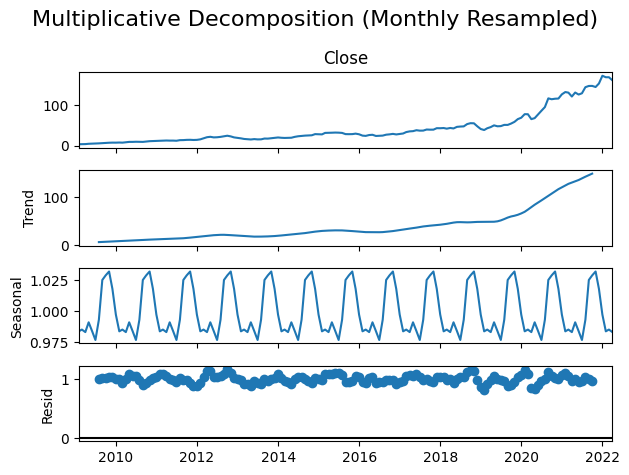

In [14]:
# plot multiplicative decomposition
plt.figure(figsize=(12,6))
multiplicative_decomp.plot()
plt.suptitle('Multiplicative Decomposition (Monthly Resampled)', fontsize=16)
plt.tight_layout()
plt.show()

In [15]:
'''
- The trend component shows a clear and smooth upward progression—well captured.
- The seasonal component varies proportionally to the level of the series (i.e., multiplicative seasonality is scale-aware).
- The residuals are more evenly distributed across time compared to the additive model.
- Suitable for exponential growth behavior, which is evident in AAPL stock price (especially post-2010).
Minor Notes:
- The seasonal component fluctuates around 1 (instead of 0), as expected in a multiplicative model.
'''

'\n- The trend component shows a clear and smooth upward progression—well captured.\n- The seasonal component varies proportionally to the level of the series (i.e., multiplicative seasonality is scale-aware).\n- The residuals are more evenly distributed across time compared to the additive model.\n- Suitable for exponential growth behavior, which is evident in AAPL stock price (especially post-2010).\nMinor Notes:\n- The seasonal component fluctuates around 1 (instead of 0), as expected in a multiplicative model.\n'

ADF Statistic: 2.9662845897868992
p-value: 1.0


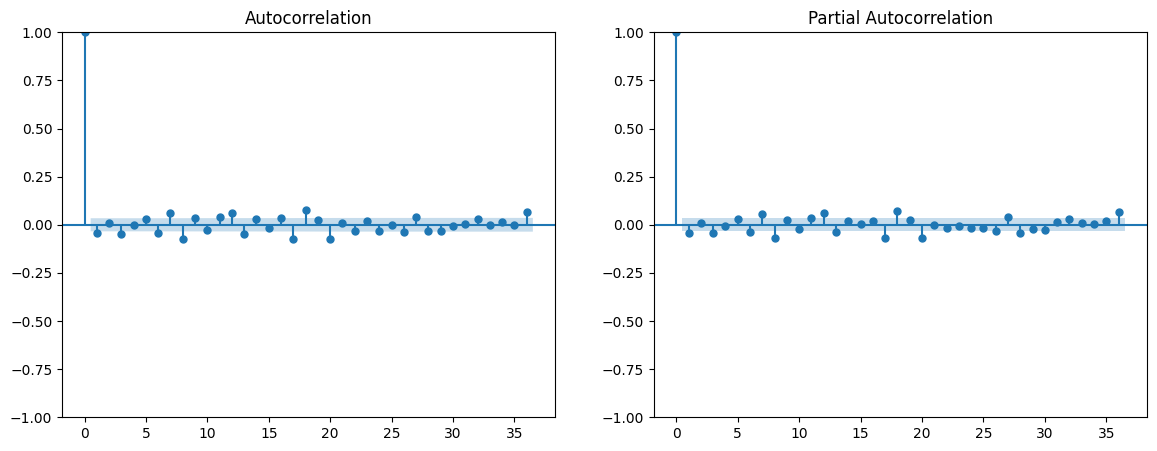

In [16]:
from statsmodels.tsa.stattools import adfuller

# Test for stationarity
result = adfuller(df['Close'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# Differencing to make stationary if needed
df_diff = df['Close'].diff().dropna()

# ACF and PACF plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plot_acf(df_diff, ax=axes[0])
plot_pacf(df_diff, ax=axes[1])
plt.show()


In [17]:
'''
ADF:
- ADF Statistic: 2.9662845897868992
- p-value: 1
The time series is non-stationary, since the p-value is 1.0.
ACF and PACF shows correlation of the time series with lags of itself and do not show strong lags, consistent with a non-stationary or random walk process.
It likely needs differencing or transformation to become stationary before applying models like ARIMA.
'''

'\nThe time series is non-stationary, since the p-value is 1.0.\nACF and PACF shows correlation of the time series with lags of itself and do not show strong lags, consistent with a non-stationary or random walk process.\nIt likely needs differencing or transformation to become stationary before applying models like ARIMA.\n'

ADF Statistic (1st diff): -11.658519734547664
p-value (1st diff): 1.9588026485288317e-21


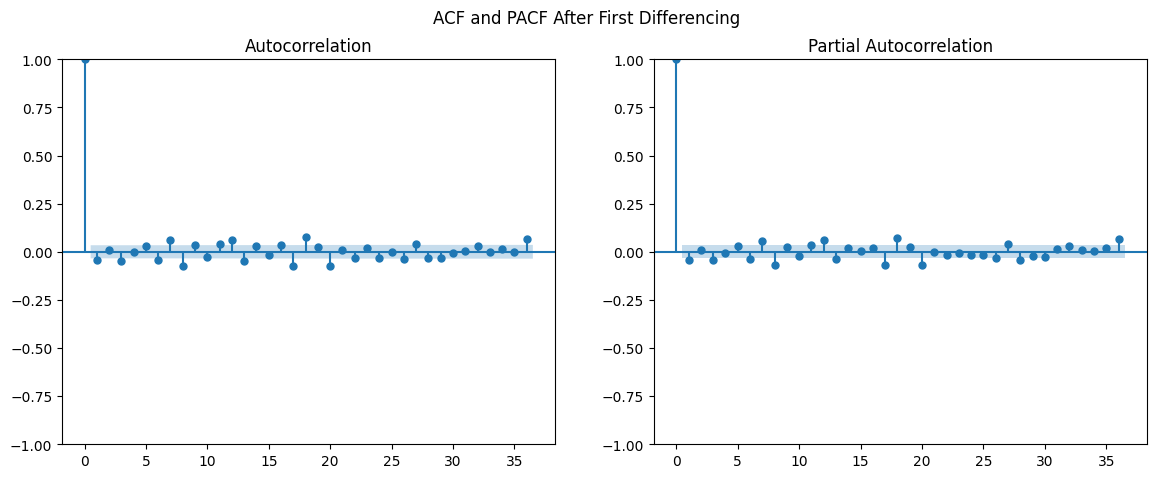

In [18]:
# First-order differencing to make stationary
df_diff = df['Close'].diff().dropna()

# ADF test after differencing
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df_diff)
print(f"ADF Statistic (1st diff): {adf_result[0]}")
print(f"p-value (1st diff): {adf_result[1]}")

# ACF and PACF after differencing
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plot_acf(df_diff, ax=axes[0])
plot_pacf(df_diff, ax=axes[1])
plt.suptitle('ACF and PACF After First Differencing')
plt.show()



In [19]:
'''
ADF Test After First Differencing:
- ADF Statistic: -11.658519734547664
- p-value: 1.9588026485288317e-21

Interpretation: ADF statistic is strongly negative.
p-value is significantly less than 0.05 (essentially 0).
Conclusion:
After first differencing, the time series is now stationary. You can reject the null hypothesis of the ADF test.

ACF (Left Plot) and PACF (Right Plot) – After First Differencing
Key observations:
Most spikes after lag 0 are within the confidence bounds (blue region), indicating no strong autocorrelation.
The ACF shows a quick drop-off, typical of a stationary series.
The PACF also shows no significant lags after the first.

Your original series was non-stationary.
After differencing once (d = 1), it became stationary.
The ACF and PACF show no strong patterns, which can help in choosing ARIMA model parameters:
'''

'\nADF Test After First Differencing:\n- ADF Statistic: -15.048649473685908\n- p-value: 9.36e-28\n\nInterpretation: ADF statistic is strongly negative.\np-value is significantly less than 0.05 (essentially 0).\nConclusion:\nAfter first differencing, the time series is now stationary. You can reject the null hypothesis of the ADF test.\n\nACF (Left Plot) and PACF (Right Plot) – After First Differencing\nKey observations:\nMost spikes after lag 0 are within the confidence bounds (blue region), indicating no strong autocorrelation.\nThe ACF shows a quick drop-off, typical of a stationary series.\nThe PACF also shows no significant lags after the first.\n\nYour original series was non-stationary.\nAfter differencing once (d = 1), it became stationary.\nThe ACF and PACF show no strong patterns, which can help in choosing ARIMA model parameters:\n'

In [20]:
# Step 5: Train-Test Split

train = monthly_data.iloc[:-12]
test = monthly_data.iloc[-12:]

print(f"Train size: {len(train)} months")
print(f"Test size: {len(test)} months")




Train size: 147 months
Test size: 12 months


In [21]:
# Step 6: ARIMA Model
from statsmodels.tsa.arima.model import ARIMA
arima_model = ARIMA(train, order=(1, 1, 1))
arima_result = arima_model.fit()

# Forecast next 12 months
forecast_arima = arima_result.forecast(steps=12)

In [22]:
#Step 7: SARIMA Model (Seasonal ARIMA)
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarima_model = SARIMAX(train,
                       order=(1, 1, 1),
                       seasonal_order=(1, 1, 1, 12),
                       enforce_stationarity=False,
                       enforce_invertibility=False)
sarima_result = sarima_model.fit()

# Forecast next 12 months
forecast_sarima = sarima_result.forecast(steps=12)

In [23]:
# Step 8: Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Evaluation Function
def evaluate_forecast(true, predicted, model_name="Model"):
    rmse = np.sqrt(mean_squared_error(true, predicted))
    mae = mean_absolute_error(true, predicted)
    mape = mean_absolute_percentage_error(true, predicted)

    print(f"\n📊 {model_name} Evaluation:")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE : {mae:.2f}")
    print(f"MAPE: {mape:.2f}%")

In [24]:
# Evaluate ARIMA
evaluate_forecast(test, forecast_arima, model_name="ARIMA(1,1,1)")

# Evaluate SARIMA
evaluate_forecast(test, forecast_sarima, model_name="SARIMA(1,1,1,12)")


📊 ARIMA(1,1,1) Evaluation:
RMSE: 36.94
MAE : 33.51
MAPE: 21.43%

📊 SARIMA(1,1,1,12) Evaluation:
RMSE: 19.64
MAE : 17.78
MAPE: 11.40%


In [25]:
'''
Interpretation:
SARIMA (Seasonal ARIMA) outperforms the basic ARIMA model on all metrics:
- Lower RMSE → better overall error handling.
- Lower MAE → more accurate average predictions.
- Lower MAPE → better relative (percentage) accuracy.

Conclusion:
- Apple closing Stock price has time series likely has seasonal patterns, and SARIMA is capturing them effectively.
- Prefer SARIMA over standard ARIMA for this dataset.
'''

'\nInterpretation:\nSARIMA (Seasonal ARIMA) outperforms the basic ARIMA model on all metrics:\n- Lower RMSE → better overall error handling.\n- Lower MAE → more accurate average predictions.\n- Lower MAPE → better relative (percentage) accuracy.\n\nConclusion:\n- Apple closing Stock price has time series likely has seasonal patterns, and SARIMA is capturing them effectively.\n- Prefer SARIMA over standard ARIMA for this dataset.\n'

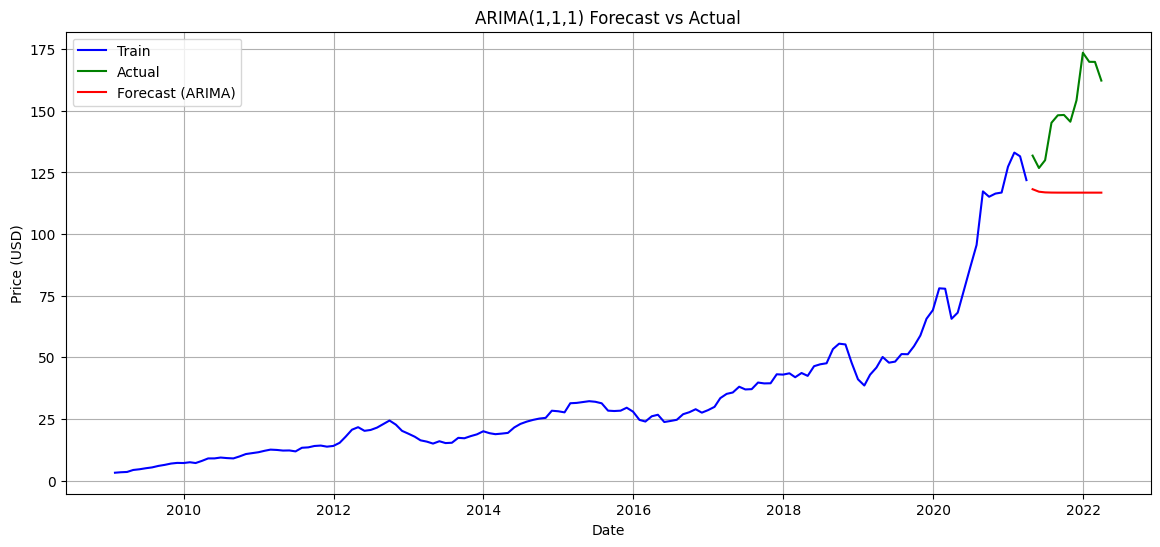

In [26]:
# Step 5.3: Plot actual vs forecasted
plt.figure(figsize=(14, 6))
plt.plot(train.index, train, label="Train", color='blue')
plt.plot(test.index, test, label="Actual", color='green')
plt.plot(test.index, forecast_arima, label="Forecast (ARIMA)", color='red')
plt.title("ARIMA(1,1,1) Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

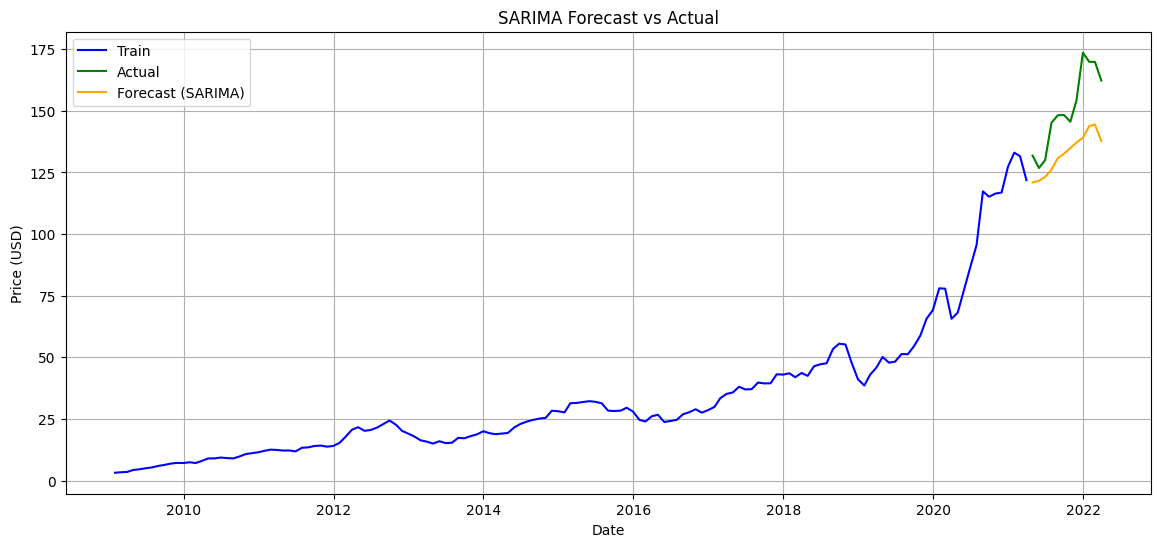

In [27]:
# Plot SARIMA forecast
plt.figure(figsize=(14, 6))
plt.plot(train.index, train, label="Train", color='blue')
plt.plot(test.index, test, label="Actual", color='green')
plt.plot(test.index, forecast_sarima, label="Forecast (SARIMA)", color='orange')
plt.title("SARIMA Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()


In [28]:
'''
Arima forecast is flat
Sarima forecast has similar pattern to actual so Sirima is better
'''

'\nArima forecast is flat\nSarima forecast has similar pattern to actual so Sirima is better\n'

In [30]:
import pickle

# Save ARIMA model
with open("arima_model_aapl.pkl", "wb") as f:
    pickle.dump((arima_result,df.index[-1]), f)

# Save SARIMA model
with open("sarima_model_aapl.pkl", "wb") as f:
    pickle.dump((sarima_result, df.index[-1]), f)
